In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')

from astroLuSt.preprocessing import sorting as alprso


importlib.reload(alprso)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# `sort_into_batches()`
Sort a nested array entries of different lengths into batches that contain all arrays of equal lengths

X.shape=(30,), y1.shape=(30, 1), y2.shape=(30, 1), y3.shape=(30,)
X_batches.shape=(15,), y1_batches.shape=(15,), y2_batches.shape=(15,), y3_batches.shape=(15,)


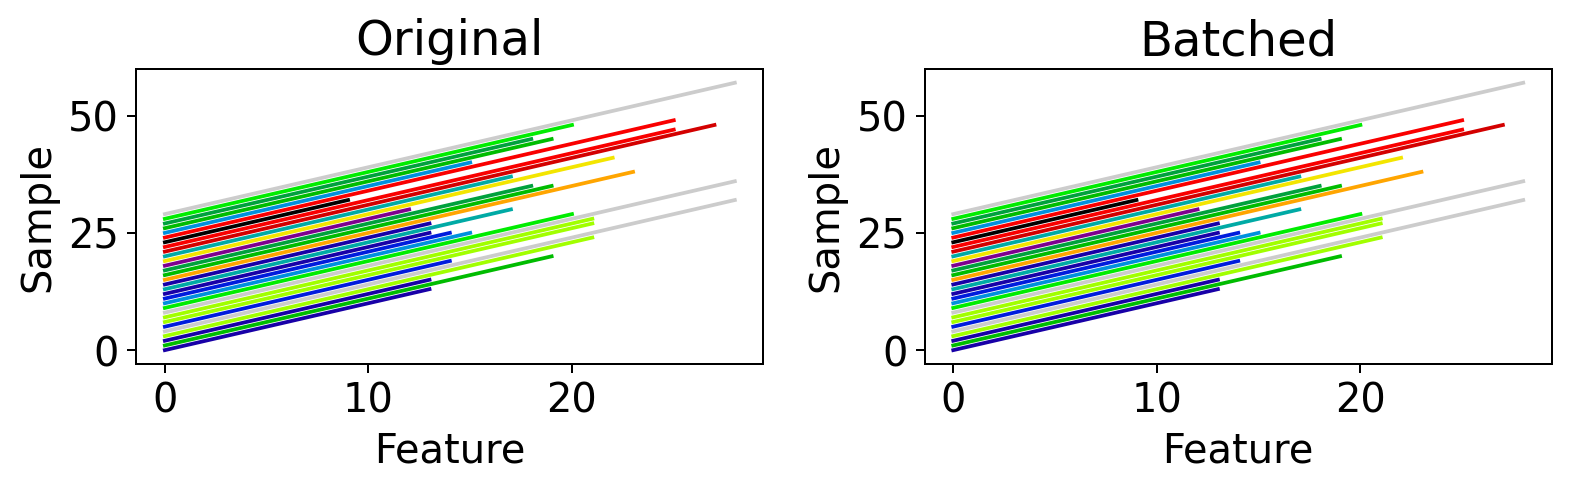

In [2]:
importlib.reload(alprso)

nsamples = 30
classes = ["A", "B", "C"]
X = np.array([np.arange(np.random.randint(10,30)) for _ in range(nsamples)], dtype=object)
y1 = np.arange(nsamples).reshape(-1,1)                                      #some encodes sample number
y2 = np.random.choice(classes, replace=True, size=(nsamples)).reshape(-1,1) #some random class
y3 = np.array([len(x) for x in X])                                          #encodes sequence lengths
print(f"{X.shape=}, {y1.shape=}, {y2.shape=}, {y3.shape=}")

#get unique lengths
u_lens = list(np.unique(y3))

X_batches, y1_batches, y2_batches, y3_batches = alprso.sort_into_batches(X, y1, y2, y3)

print(f"{X_batches.shape=}, {y1_batches.shape=}, {y2_batches.shape=}, {y3_batches.shape=}")

colors = plt.get_cmap("nipy_spectral")(np.linspace(0,1,len(u_lens)))
fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(121, title="Original")
ax2 = fig.add_subplot(122, title="Batched")
for idx in range(len(X)):
    ax1.plot(X[idx]+y1[idx,0], color=colors[u_lens.index(y3[idx])])

for idx in range(len(X_batches)):
    X_batches_i = np.vstack(X_batches[idx])
    for batch_idx, X_batch in enumerate(X_batches_i):
        ax2.plot(X_batch+y1_batches[idx][batch_idx], color=colors[u_lens.index(y3_batches[idx][batch_idx])])

ax1.set_xlabel("Feature")
ax1.set_ylabel("Sample")
ax2.set_xlabel("Feature")
ax2.set_ylabel("Sample")

fig.tight_layout()    
plt.show()
